## Overview

This notebook will show you how to create and query a table or DataFrame that you uploaded to DBFS. [DBFS](https://docs.databricks.com/user-guide/dbfs-databricks-file-system.html) is a Databricks File System that allows you to store data for querying inside of Databricks. This notebook assumes that you have a file already inside of DBFS that you would like to read from.

This notebook is written in **Python** so the default cell type is Python. However, you can use different languages by using the `%LANGUAGE` syntax. Python, Scala, SQL, and R are all supported.

In [0]:
# File location and type
file_location = "/FileStore/tables/WA_Fn_UseC__Telco_Customer_Churn.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Churn is the column we need to predict

In [0]:
from pyspark.sql.types import DoubleType
df=df.withColumn("TotalCharges",df["TotalCharges"].cast(DoubleType()))

In [0]:
df.printSchema()

root
-- customerID: string (nullable = true)
-- gender: string (nullable = true)
-- SeniorCitizen: integer (nullable = true)
-- Partner: string (nullable = true)
-- Dependents: string (nullable = true)
-- tenure: integer (nullable = true)
-- PhoneService: string (nullable = true)
-- MultipleLines: string (nullable = true)
-- InternetService: string (nullable = true)
-- OnlineSecurity: string (nullable = true)
-- OnlineBackup: string (nullable = true)
-- DeviceProtection: string (nullable = true)
-- TechSupport: string (nullable = true)
-- StreamingTV: string (nullable = true)
-- StreamingMovies: string (nullable = true)
-- Contract: string (nullable = true)
-- PaperlessBilling: string (nullable = true)
-- PaymentMethod: string (nullable = true)
-- MonthlyCharges: double (nullable = true)
-- TotalCharges: double (nullable = true)
-- Churn: string (nullable = true)

In [0]:
from pyspark.sql.functions import isnan, when, count,col
display(df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns] ))

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0


### Converting to Pandas df can help visualisation if the dataset is not too large

In [0]:
pd_df = df.toPandas()

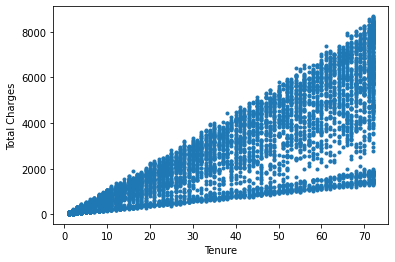

In [0]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(pd_df["tenure"],pd_df["TotalCharges"],'.')
plt.xlabel("Tenure")
plt.ylabel("Total Charges")
display()

## SQL based analysis

In [0]:
# Create a view or table

temp_table_name = "churn_analysis"

df.createOrReplaceTempView(temp_table_name)

In [0]:
%sql      /* %sql is used when you have to run sql queries */

/* Query the created temp table in a SQL cell */

select * from churn_analysis

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [0]:
df.groupBy("Churn").count().show()

+-----+-----+
Churn|count|
+-----+-----+
 No| 5174|
 Yes| 1869|
+-----+-----+

In [0]:
df.select("tenure","MonthlyCharges","TotalCharges").describe().show()  ##descriptive statistics of numerical columns

+-------+------------------+------------------+------------------+
summary| tenure| MonthlyCharges| TotalCharges|
+-------+------------------+------------------+------------------+
 count| 7043| 7043| 7032|
 mean| 32.37114865824223| 64.76169246059922|2283.3004408418697|
 stddev|24.559481023094442|30.090047097678482| 2266.771361883145|
 min| 0| 18.25| 18.8|
 max| 72| 118.75| 8684.8|
+-------+------------------+------------------+------------------+

In [0]:
%sql

select gender,churn,count(*) from churn_analysis group by gender,churn    
-- We can see there is not much difference between male and female, so we can even drop one column 

gender,churn,count(1)
Male,No,2625
Male,Yes,930
Female,No,2549
Female,Yes,939


In [0]:
%sql
select SeniorCitizen,churn,count(*) from churn_analysis group by SeniorCitizen,churn 
-- if the user is a senior citizen, he is more likely to churn

SeniorCitizen,churn,count(1)
1,No,666
0,No,4508
0,Yes,1393
1,Yes,476


In [0]:
%sql
select tenure,churn,count(churn) from churn_analysis group by tenure,churn order by tenure
-- customers with less tenure churn more 

tenure,churn,count(churn)
0,No,11
1,No,233
1,Yes,380
2,No,115
2,Yes,123
3,No,106
3,Yes,94
4,No,93
4,Yes,83
5,No,69


In [0]:
df.stat.crosstab("SeniorCitizen","InternetService").show()

+-----------------------------+----+-----------+----+
SeniorCitizen_InternetService| DSL|Fiber optic| No|
+-----------------------------+----+-----------+----+
 1| 259| 831| 52|
 0|2162| 2265|1474|
+-----------------------------+----+-----------+----+

In [0]:
%sql
select SeniorCitizen, InternetService,count(InternetService) from churn_analysis group by InternetService,SeniorCitizen

SeniorCitizen,InternetService,count(InternetService)
0,Fiber optic,2265
1,No,52
1,Fiber optic,831
1,DSL,259
0,DSL,2162
0,No,1474


In [0]:
df.stat.freqItems(["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"],0.6).collect()  #frequent values occuring above 60%

Out[15]: [Row(PhoneService_freqItems=['Yes'], MultipleLines_freqItems=['Yes'], InternetService_freqItems=['Fiber optic'], OnlineSecurity_freqItems=['No'], OnlineBackup_freqItems=['Yes'], DeviceProtection_freqItems=['No'], TechSupport_freqItems=['No'], StreamingTV_freqItems=['Yes'], StreamingMovies_freqItems=['No'])]

In [0]:
%sql
select PaperlessBilling,churn,count(*) from churn_analysis group by PaperlessBilling,churn


PaperlessBilling,churn,count(1)
Yes,Yes,1400
No,No,2403
Yes,No,2771
No,Yes,469


In [0]:
%sql
select PaymentMethod,churn,count(*) from churn_analysis group by PaymentMethod,churn

PaymentMethod,churn,count(1)
Credit card (automatic),No,1290
Bank transfer (automatic),No,1286
Mailed check,Yes,308
Credit card (automatic),Yes,232
Electronic check,No,1294
Electronic check,Yes,1071
Bank transfer (automatic),Yes,258
Mailed check,No,1304


### Model Building

In [0]:
#train test split
churn_df = df
(train_data,test_data) = churn_df.randomSplit([0.7,0.3],24)
print("train data ",train_data.count())
print("test data ",test_data.count())

train data 4942
test data 2101

## spark ML pipeline

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer,VectorAssembler

In [0]:
df.columns

Out[18]: ['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [0]:
cat_columns = [
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling']

In [0]:
stages = []
for cat in cat_columns:
  stringIndexer = StringIndexer(inputCol=cat, outputCol=cat+"Index")
  encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()],outputCols=[cat+"catVec"])
  stages+=[stringIndexer,encoder]

In [0]:
stages

Out[21]: [StringIndexer_9e5401945465,
 OneHotEncoder_345d2a7e8806,
 StringIndexer_eb7bc00f10c7,
 OneHotEncoder_614cd310c93d,
 StringIndexer_3237d3f784e4,
 OneHotEncoder_fab6919d1035,
 StringIndexer_f5c0c329cb84,
 OneHotEncoder_d314704363a9,
 StringIndexer_bef895b97281,
 OneHotEncoder_ebebf6dfbac1,
 StringIndexer_9e7e60d058da,
 OneHotEncoder_de16f1d8510a,
 StringIndexer_f350675cd4ff,
 OneHotEncoder_04a2c2b637c7,
 StringIndexer_724fc33f169f,
 OneHotEncoder_7ab856a86fbc,
 StringIndexer_643bbdbc1272,
 OneHotEncoder_45e966dba6b7,
 StringIndexer_930fb3eb83e2,
 OneHotEncoder_8c35dc0856f9,
 StringIndexer_d0cfd645b992,
 OneHotEncoder_3750ae118b61,
 StringIndexer_94968f06ed03,
 OneHotEncoder_ca3e05b5988f,
 StringIndexer_3fb992df6094,
 OneHotEncoder_31c356f6ce2d,
 StringIndexer_6c2609101718,
 OneHotEncoder_81743b572cdc,
 StringIndexer_c3e60f0c1948,
 OneHotEncoder_d7c1bbc0d449]

In [0]:
#missing values in TotalCharges column
from pyspark.ml.feature import Imputer
imputer = Imputer(inputCols=["TotalCharges"],outputCols=["Out_TotalCharges"])
stages += [imputer]

In [0]:
label_Idx = StringIndexer(inputCol="Churn",outputCol="label")
stages += [label_Idx] 

In [0]:
df.stat.corr('TotalCharges','MonthlyCharges')

Out[24]: 0.6511738315787813

In [0]:
from pyspark.ml.feature import QuantileDiscretizer
tenure_bin = QuantileDiscretizer(numBuckets=3, inputCol='tenure',outputCol='tenure_bin')
stages+=[tenure_bin]
##tenure from 1 to 72 will be split into 3

In [0]:
stages

Out[26]: [StringIndexer_9e5401945465,
 OneHotEncoder_345d2a7e8806,
 StringIndexer_eb7bc00f10c7,
 OneHotEncoder_614cd310c93d,
 StringIndexer_3237d3f784e4,
 OneHotEncoder_fab6919d1035,
 StringIndexer_f5c0c329cb84,
 OneHotEncoder_d314704363a9,
 StringIndexer_bef895b97281,
 OneHotEncoder_ebebf6dfbac1,
 StringIndexer_9e7e60d058da,
 OneHotEncoder_de16f1d8510a,
 StringIndexer_f350675cd4ff,
 OneHotEncoder_04a2c2b637c7,
 StringIndexer_724fc33f169f,
 OneHotEncoder_7ab856a86fbc,
 StringIndexer_643bbdbc1272,
 OneHotEncoder_45e966dba6b7,
 StringIndexer_930fb3eb83e2,
 OneHotEncoder_8c35dc0856f9,
 StringIndexer_d0cfd645b992,
 OneHotEncoder_3750ae118b61,
 StringIndexer_94968f06ed03,
 OneHotEncoder_ca3e05b5988f,
 StringIndexer_3fb992df6094,
 OneHotEncoder_31c356f6ce2d,
 StringIndexer_6c2609101718,
 OneHotEncoder_81743b572cdc,
 StringIndexer_c3e60f0c1948,
 OneHotEncoder_d7c1bbc0d449,
 Imputer_e844a798d228,
 StringIndexer_15abfd5268bd,
 QuantileDiscretizer_ff9d638e2242]

In [0]:
##vector assembler -take all the values and create an array and will be the input to the model
numericCols=["tenure_bin","Out_TotalCharges","MonthlyCharges"]
assembleInputs = assemblerInputs=[c+"catVec" for c in cat_columns]+numericCols
assembler = VectorAssembler(inputCols=assembleInputs,outputCol="features")
stages +=[assembler]



In [0]:
pipeline = Pipeline().setStages(stages)
pipelineModel= pipeline.fit(train_data)

In [0]:
trainprepDF = pipelineModel.transform(train_data)
testprepDF = pipelineModel.transform(test_data)

In [0]:
trainprepDF.head(1)

Out[30]: [Row(customerID='0002-ORFBO', gender='Female', SeniorCitizen=0, Partner='Yes', Dependents='Yes', tenure=9, PhoneService='Yes', MultipleLines='No', InternetService='DSL', OnlineSecurity='No', OnlineBackup='Yes', DeviceProtection='No', TechSupport='Yes', StreamingTV='Yes', StreamingMovies='No', Contract='One year', PaperlessBilling='Yes', PaymentMethod='Mailed check', MonthlyCharges=65.6, TotalCharges=593.3, Churn='No', genderIndex=1.0, gendercatVec=SparseVector(1, {}), SeniorCitizenIndex=0.0, SeniorCitizencatVec=SparseVector(1, {0: 1.0}), PartnerIndex=1.0, PartnercatVec=SparseVector(1, {}), DependentsIndex=1.0, DependentscatVec=SparseVector(1, {}), PhoneServiceIndex=0.0, PhoneServicecatVec=SparseVector(1, {0: 1.0}), MultipleLinesIndex=0.0, MultipleLinescatVec=SparseVector(2, {0: 1.0}), InternetServiceIndex=1.0, InternetServicecatVec=SparseVector(2, {1: 1.0}), OnlineSecurityIndex=0.0, OnlineSecuritycatVec=SparseVector(2, {0: 1.0}), OnlineBackupIndex=1.0, OnlineBackupcatVec=SparseVector(2, {1: 1.0}), DeviceProtectionIndex=0.0, DeviceProtectioncatVec=SparseVector(2, {0: 1.0}), TechSupportIndex=1.0, TechSupportcatVec=SparseVector(2, {1: 1.0}), StreamingTVIndex=1.0, StreamingTVcatVec=SparseVector(2, {1: 1.0}), StreamingMoviesIndex=0.0, StreamingMoviescatVec=SparseVector(2, {0: 1.0}), ContractIndex=2.0, ContractcatVec=SparseVector(2, {}), PaperlessBillingIndex=0.0, PaperlessBillingcatVec=SparseVector(1, {0: 1.0}), Out_TotalCharges=593.3, label=0.0, tenure_bin=0.0, features=SparseVector(27, {1: 1.0, 4: 1.0, 5: 1.0, 8: 1.0, 9: 1.0, 12: 1.0, 13: 1.0, 16: 1.0, 18: 1.0, 19: 1.0, 23: 1.0, 25: 593.3, 26: 65.6}))]

In [0]:
from pyspark.ml.classification import LogisticRegression

#create initial log reg model
lr = LogisticRegression(labelCol="label",featuresCol="features",maxIter=10)

#train model with training data
lrModel = lr.fit(trainprepDF)

In [0]:
print("Coefficients : "+str(lrModel.coefficients))
print("Intercept : "+str(lrModel.intercept))

Coefficients : [0.033740768293881875,-0.35851274016170903,-0.10175691873230887,0.1348983088159304,-0.6508806802910643,-0.25911213333781374,0.02747706357539719,0.632585799551728,-0.4452360972161209,0.28836137766840503,-0.0814842463198383,0.19065454710428595,0.03757774523266961,0.15362299241197785,0.07778510754453039,0.277146642312607,-0.06668116355507629,-0.03492013663021195,0.2696600701811889,0.020243592171226024,0.21224024642259195,0.7534547754931266,-0.8761688802668364,0.3340265718769061,-0.7272569182704135,-0.00012342587082198015,0.005678873528700106]
Intercept : -1.151741070119595

In [0]:
summary=lrModel.summary

imbalance data - precision and recall better than accuracy as evaluation metrics

In [0]:
accuracy = summary.accuracy
falsePositiveRate =summary.weightedFalsePositiveRate
truePosrate = summary.weightedTruePositiveRate
fmeasure = summary.weightedFMeasure()
precision=summary.weightedPrecision
recall=summary.weightedRecall
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s\nAreaUnderROC: %s"
      % (accuracy,falsePositiveRate,truePosrate,fmeasure,precision,recall,summary.areaUnderROC))

Accuracy: 0.8073654390934845
FPR: 0.3624316094822354
TPR: 0.8073654390934845
F-measure: 0.8007258689799281
Precision: 0.7985959090104149
Recall: 0.8073654390934845
AreaUnderROC: 0.8482104876690156

In [0]:
display(lrModel,trainprepDF,"ROC")

False Positive Rate,True Positive Rate,Threshold
0.0,0.0,0.8774626235407175
0.0,0.029411764705882353,0.8774626235407175
0.0,0.058823529411764705,0.8231243504718575
0.0,0.08823529411764706,0.7910560365922865
0.013333333333333334,0.08823529411764706,0.749084286485046
0.013333333333333334,0.11764705882352941,0.7487643865380953
0.013333333333333334,0.14705882352941177,0.7435675249471632
0.013333333333333334,0.17647058823529413,0.7370309853055703
0.013333333333333334,0.20588235294117646,0.7297782788389471
0.02666666666666667,0.20588235294117646,0.7065694164679909


Evaluation Metric with test data

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
predictions = lrModel.transform(testprepDF)
evaluatorLR = BinaryClassificationEvaluator(rawPredictionCol="prediction")
area_under_curve = evaluatorLR.evaluate(predictions)

#default evaluation is areaunder roc
print("Area under ROC = %g" % area_under_curve)
evaluatorLR.getMetricName()

Area under ROC = 0.70473
Out[36]: 'areaUnderROC'

In [0]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics
results = predictions.select(['prediction','label'])

results_collect  = results.collect()
results_list = [(float(i[0]),float(i[1])) for i in results_collect]
predictionAndLabels = sc.parallelize(results_list)

metrics = BinaryClassificationMetrics(predictionAndLabels)

#Area under precision-recall curve
print("Area under PR = ",metrics.areaUnderPR)

#Area under ROC curve
print("Area under ROC= ",metrics.areaUnderROC)

#area under the pr is not good. Looks like there was overfitting the training data

Area under PR = 0.546971128986179
Area under ROC= 0.7047304024705155

In [0]:
#Evaluation by creating other metrics with code

test_data.groupBy('Churn').count().show()

+-----+-----+
Churn|count|
+-----+-----+
 No| 1534|
 Yes| 567|
+-----+-----+

In [0]:
count = predictions.count()
correct = results.filter(results.prediction == results.label).count()
wrong = results.filter(results.prediction != results.label).count()
tp = results.filter(results.prediction == 1.0).filter(results.prediction == results.label).count()
fp = results.filter(results.prediction == 1.0).filter(results.prediction != results.label).count()
fn = results.filter(results.prediction == 0.0).filter(results.prediction != results.label).count()
tn = results.filter(results.prediction == 0.0).filter(results.prediction == results.label).count()

accuracy = (tp+tn)/count
precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Correct ",correct)
print("Wrong ",wrong)
print("Precision ",precision)
print("Accuaracy ",accuracy)
print("Recall ",recall)

Correct 1659
Wrong 442
Precision 0.6344086021505376
Accuaracy 0.7896239885768681
Recall 0.5202821869488536

In [0]:
#Grid search and cross validator to try and improve the precision and recall
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
#Create ParamGrid for Cross validation
paramGrid = (ParamGridBuilder()
            .addGrid(lr.regParam,[0.01,0.5,2])
            .addGrid(lr.elasticNetParam,[0.0,0.5,1])
            .addGrid(lr.maxIter,[5,10,20]).build())

In [0]:
cv = CrossValidator(estimator=lr,estimatorParamMaps=paramGrid,evaluator=evaluatorLR,numFolds=5)

#RUN CROSS VALIDATIONS
cvModel = cv.fit(trainprepDF)

/databricks/spark/python/pyspark/ml/util.py:800: UserWarning: Cannot find mlflow module. To enable MLflow logging, install mlflow from PyPI.
 warnings.warn(_MLflowInstrumentation._NO_MLFLOW_WARNING)

In [0]:
#picking the best model from the cross validated models to transform the test data
predictions = cvModel.bestModel.transform(testprepDF)

In [0]:
evaluatorLR.evaluate(predictions)

Out[46]: 0.7025068465746431

In [0]:
count = predictions.count()
correct = results.filter(results.prediction == results.label).count()
wrong = results.filter(results.prediction != results.label).count()
tp = results.filter(results.prediction == 1.0).filter(results.prediction == results.label).count()
fp = results.filter(results.prediction == 1.0).filter(results.prediction != results.label).count()
fn = results.filter(results.prediction == 0.0).filter(results.prediction != results.label).count()
tn = results.filter(results.prediction == 0.0).filter(results.prediction == results.label).count()

accuracy = (tp+tn)/count
precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Correct ",correct)
print("Wrong ",wrong)
print("Precision ",precision)
print("Accuaracy ",accuracy)
print("Recall ",recall) 

#CRoss validation hasnt worked well enough

Correct 1659
Wrong 442
Precision 0.6344086021505376
Accuaracy 0.7896239885768681
Recall 0.5202821869488536

In [0]:
cvModel.explainParams()

Out[48]: "estimator: estimator to be cross-validated (current: LogisticRegression_cdb22ea23be9)\nestimatorParamMaps: estimator param maps (current: [{Param(parent='LogisticRegression_cdb22ea23be9', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent='LogisticRegression_cdb22ea23be9', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0, Param(parent='LogisticRegression_cdb22ea23be9', name='maxIter', doc='max number of iterations (>= 0).'): 5}, {Param(parent='LogisticRegression_cdb22ea23be9', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent='LogisticRegression_cdb22ea23be9', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0, Param(parent='LogisticRegression_cdb22ea23be9', name='maxIter', doc='max number of iterations (>= 0).'): 10}, {Param(parent='LogisticRegression_cdb22ea23be9', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent='LogisticRegression_cdb22ea23be9', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0, Param(parent='LogisticRegression_cdb22ea23be9', name='maxIter', doc='max number of iterations (>= 0).'): 20}, {Param(parent='LogisticRegression_cdb22ea23be9', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent='LogisticRegression_cdb22ea23be9', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.5, Param(parent='LogisticRegression_cdb22ea23be9', name='maxIter', doc='max number of iterations (>= 0).'): 5}, {Param(parent='LogisticRegression_cdb22ea23be9', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent='LogisticRegression_cdb22ea23be9', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.5, Param(parent='LogisticRegression_cdb22ea23be9', name='maxIter', doc='max number of iterations (>= 0).'): 10}, {Param(parent='LogisticRegression_cdb22ea23be9', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent='LogisticRegression_cdb22ea23be9', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.5, Param(parent='LogisticRegression_cdb22ea23be9', name='maxIter', doc='max number of iterations (>= 0).'): 20}, {Param(parent='LogisticRegression_cdb22ea23be9', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent='LogisticRegression_cdb22ea23be9', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 1.0, Param(parent='LogisticRegression_cdb22ea23be9', name='maxIter', doc='max number of iterations (>= 0).'): 5}, {Param(parent='LogisticRegression_cdb22ea23be9', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent='LogisticRegression_cdb22ea23be9', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 1.0, Param(parent='LogisticRegression_cdb22ea23be9', name='maxIter', doc='max number of iterations (>= 0).'): 10}, {Param(parent='LogisticRegression_cdb22ea23be9', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent='LogisticRegression_cdb22ea23be9', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 1.0, Param(parent=

In [0]:
#trying random forest
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(labelCol='label',featuresCol='features').setImpurity("gini").setMaxDepth(6).setFeatureSubsetStrategy("auto").setSeed(1010)
rfModel = rf.fit(trainprepDF)

In [0]:
predictions = rfModel.transform(testprepDF)

In [0]:
count = predictions.count()
correct = results.filter(results.prediction == results.label).count()
wrong = results.filter(results.prediction != results.label).count()
tp = results.filter(results.prediction == 1.0).filter(results.prediction == results.label).count()
fp = results.filter(results.prediction == 1.0).filter(results.prediction != results.label).count()
fn = results.filter(results.prediction == 0.0).filter(results.prediction != results.label).count()
tn = results.filter(results.prediction == 0.0).filter(results.prediction == results.label).count()

accuracy = (tp+tn)/count
precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Correct ",correct)
print("Wrong ",wrong)
print("Precision ",precision)
print("Accuaracy ",accuracy)
print("Recall ",recall)

Correct 1659
Wrong 442
Precision 0.6344086021505376
Accuaracy 0.7896239885768681
Recall 0.5202821869488536